# Table of Contents

1. [Overview](#overview)
2. [Filter Review](#filters)
3. [Exploring CNNs](#cnn-explore)
4. [CNN Components](#cnn-comps)
    1. [Convolutional Layer](#cnn-conv)
    2. [Pooling Layer](#cnn-pooling)
    3. [Dense Layer](#cnn-fc)
    4. [Non-Linearity](#cnn-activation)
5. [Where do the weights come from?](#cnn-weights)
    1. [Viola-Jones](#viola-jones) 
    2. [Hand-waving Training Explanation](#training)
6. [Exercises](#exercises)
7. [What can CNNs do?](#cnn-examples)
    1. [Classification](#cnn-classification)
    2. [Object Detection](#cnn-detection)
    3. [Segmentation](#cnn-segmentation)
8. [What are the downsides?](#downsides)
9. [Exercises](#exercises)

# Overview <a class="anchor" id="overview"></a>

In this lesson, we'll review concepts like filtering and show how its makes up the machine learning model that is state of the art in a variety of computer vision tasks, the convolutional neural network. We'll see how this model works at a high level, where it comes from, and what it can be used for. This model will form the basis of our AI for agriculture project. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal

# Filter Review <a class="anchor" id="filters"></a>

Yesterday, we introduced <em>filters</em> and <em>convolutions</em> as a way to extract information from images. Let's first review some of the relevant concepts and see where we can go next.

## Horizontal Line

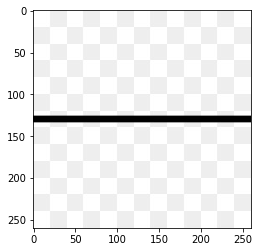

In [2]:
line_img_path = "images3/horizontal_line.jpg"

line_img = Image.open(line_img_path).convert("L")
plt.imshow(line_img, cmap='gray')

In [3]:
horizontal_filter = np.ones((3, 3))

horizontal_filter[0, :] = -1
horizontal_filter[1, :] = 2
horizontal_filter[2, :] = -1

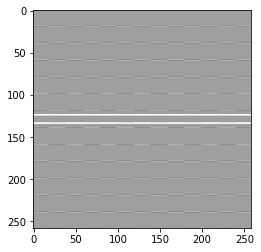

In [4]:
output = signal.convolve2d(line_img, horizontal_filter, mode='valid')
plt.imshow(output, cmap="gray")

## Diagonal Line

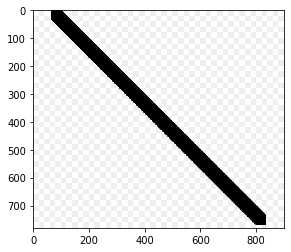

In [5]:
diag_img_path = "images3/diagonal_line.jpg"

diag_img = Image.open(diag_img_path).convert("L")
plt.imshow(diag_img, cmap="gray")

In [6]:
diagonal_filter = -1 * np.ones((3, 3))

diagonal_filter[0, 0] = 2
diagonal_filter[1, 1] = 2
diagonal_filter[2, 2] = 2

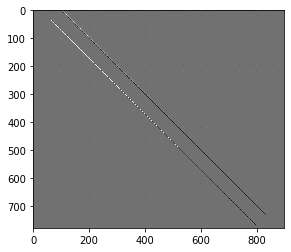

In [7]:
output = signal.convolve2d(diag_img, diagonal_filter, mode='valid')
plt.imshow(output, cmap="gray")

## Human Face

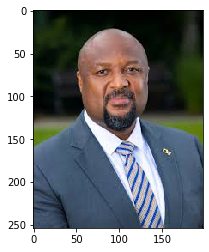

In [8]:
face_img_path = "images3/charles_isbell.jpg"

face_img = Image.open(face_img_path)
plt.imshow(face_img)

...Huh. Maybe this is harder than I thought. 

If we can't get a single filter to detect a face, maybe we could have a bunch of filters detect a face like we did with our cartoon face. Let's pretend we were given filters that could detect eyes, mouths, and noises given the set of lines in the image. How might that work? 

<img src="images3/Facial_FlowChart.png" width="800" height="200">

This seems like a good idea in general and not just for facial detection. We can abstract what we did above and make a model that we can use for a bunch of problems! Let each edge represent convolving with some filter to extract a feature. 

<img src="images3/Feature_FlowChart.png" width="800" height="200">

What we've just defined is called a Convolutional Neural Network, commonly abbreviated as CNNs. 

- It's <em>convolutional</em> because it's just a bunch of filters being convolved with an image.
- It's a <em>network</em> because we apply a bunch of these filters on top of each other. 
- And it's called neural because it takes inspiration from how humans see...(kind of).

# Exploring CNNs <a class="anchor" id="cnn-explore"></a>

Okay, so now we know what a CNN is. But what is a CNN actually doing when it looks at an image? Does it match the intuition we had of first seeing simple shapes and then seeing more abstract ones as we throw more filters at it?

In this section, we're going to look at a layers in a neural network and see what the network sees at that level. 

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


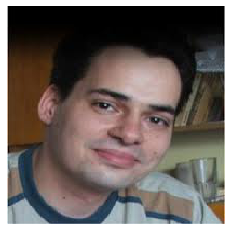

In [9]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False)

face_img_path = 'images3/face.jpg'
face_img = image.load_img(face_img_path, target_size=(224, 224))
face_x = image.img_to_array(face_img)
face_x = np.expand_dims(face_x, axis=0)

plt.axis("off")
plt.imshow(face_img)

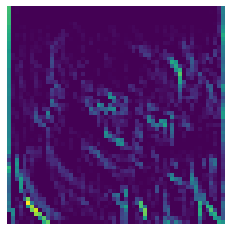

In [11]:
layers = [layer.name for layer in base_model.layers]

i = 6
j = 5

model = Model(inputs=base_model.input, outputs=base_model.get_layer(layers[i]).output)

face_x = preprocess_input(face_x)
features = model.predict(face_x)

plt.axis("off")
plt.imshow(features[0, :, :, j])

Using the above code examine what each of the following layers is doing and see if you can recognize what those filters are doing. 

1. Layer _ discovers ___. 
2. Layer _ discovers ___.
3. Layer _ discovers ___.

# CNN Components <a class="anchor" id="cnn-comps"></a>

We can think of neural networks as being constructed from simple building blocks that combined create a very general class of functions. In this section, we'll go through the different building blocks of convolutional neural networks.

## Convolutional Layer <a class="anchor" id="cnn-conv"></a>

By this point, we're pretty familiar with a convolution, but why is it such an important part of our neural network?

One way to think about it is it, that images are the same even if they're translated slightly, so we want to run the same operation over every image patch to treat each section as equal. Convolutions build this intuition in from the beginning. 

## Pooling Layer <a class="anchor" id="cnn-pooling"></a>

Sometimes we would like to show the network a downsampled version of the original image. This can help us get rid of redundent information and limit distractions in the image. 

One way of doing this is called <em>max pooling</em>. With max pooling, we only allow maximum values in a patch to move forward.

<img src="images3/pooling.png" width="800" height="200">

## Dense Layer <a class="anchor" id="cnn-fc"></a>

Dense layers, also called fully-conencted layers take the entire image into consideration. This type of layer is typically towards the end for a classification task, so the entire image can inform the class prediction. 

## Non-linearity <a class="anchor" id="cnn-activation"></a>

Non-linearities, or activations, send an input through more complicated function than what we've discussed. One reason to  do this is to compress the output into a range of numbers. 

For example, if we want a probability as output to represent the chance an image belongs to a given category, we need the output to be between 0.0 and 1.0. 

We can now see in detail what the CNN we experimented with above was actually doing. 

<img src="images3/vgg16_architecure.png" width="800" height="200">

# Where do the weights come from? <a class="anchor" id="cnn-weights"></a>

## Experts could make them by hand... <a class="anchor" id="viola-jones"></a>

In the distant time of 2001, computer vision researchers Paul Viola and Michael Jones invented the first real-time facial detection algorithm. This huge advance in computer vision was due to hand selected filters just like we've been designing. 

<img src="images3/vj_1.jpg" width="800" height="200">

<img src="images3/vj_2.jpg" width="800" height="200">

And hundreds more, initialized by hand. If we were to continue like this, we would need to determined new filters for each task (or worse, new data sets).

## ... Or we could learn them <a class="anchor" id="training"></a>

In future lessons we'll discuss in more detail how learning actually works.  For now you can think of it as penalizing weights that led to wrong answers and incentivizing weights that led to correct answers. 

# Exercises

For this section, we're going to get you more familiar with using Keras to do a simple classification task. We're going to write code to classify handwritten digits based on the number they represent. 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 12
input_shape = (28, 28, 1)

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# What else can CNNs do? <a class="anchor" id="cnn-examples"></a>

## Object Detection <a class="anchor" id="cnn-detection"></a>

<img src="images3/object_detection.jpg">

## Segmentation <a class="anchor" id="cnn-segmentation"></a>

<img src="images3/segmentation.png">

# What are the downsides? <a class="anchor" id="downsides"></a>

1. What if we have images of different sizes?
2. What if we have a task where we don't have a lot of training data?